# 'Reproducing' the Third Figure from the Lunch Talk (with Unresolved Multiplicity) (No additional IFMR)
# Using Age Table 2 Solution 1 from Lu et. al 2013. 
In this test notebook, I will examine the code that should create the juxtaposed KLF's of stars from the Galacitc Center and from their MIST and BPASS cluster counterparts. Final product should be similar to Figure 1 in Lu et al. 2013.

Firstly, I grab some code from the  jlu_python/jlu/papers/lu_gc_imf.py directory in the Moving Universe Lab's computers.

In [1]:
# After spending a bit of time figuring out how pickling files and loading works
# I have finally done it.

# These come from 
import pickle
import sys
from spisea import evolution

class dat:
    datin = "Description: Container of Data"

def load_klf_by_radius(rmin=0, rmax=30, mask_for_log=False):
    pickleFile = ('%sklf_r_%.1f_%.1f.dat' %
                  ('/Users/jlu/work/gc/imf/klf/current/', rmin, rmax))
    _in = open(pickleFile, 'rb')
    d = dat()
    d.Kp = pickle.load(_in,encoding='bytes')
    d.N = pickle.load(_in, encoding='bytes')
    d.eN = pickle.load(_in, encoding='bytes')

    d.N_ext = pickle.load(_in, encoding='bytes')
    d.eN_ext = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')

    d.KLF = pickle.load(_in, encoding='bytes')
    d.eKLF = pickle.load(_in, encoding='bytes')

    d.KLF_ext = pickle.load(_in,
                            encoding='bytes')
    d.eKLF_ext = pickle.load(_in,
                             encoding='bytes')

    d.KLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_im = pickle.load(_in,
                                      encoding='bytes')
    d.eKLF_ext_cmp_sp_im = pickle.load(_in,
                                       encoding='bytes')

    d.N_noWR = pickle.load(_in, encoding='bytes')
    d.eN_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_noWR = pickle.load(_in,
                                      encoding='bytes')
    d.eN_ext_cmp_sp_noWR = pickle.load(_in,
                                       encoding='bytes')

    d.N_ext_cmp_sp_im_noWR = pickle.load(_in,
                                         encoding='bytes')
    d.eN_ext_cmp_sp_im_noWR = pickle.load(_in,
                                          encoding='bytes')

    d.KLF_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_noWR = pickle.load(_in,
                                        encoding='bytes')
    d.eKLF_ext_cmp_sp_noWR = pickle.load(_in,
                                         encoding='bytes')

    d.KLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                           encoding='bytes')
    d.eKLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                            encoding='bytes')

    d.comp_spec_ext = pickle.load(_in, encoding='bytes')
    d.comp_imag_ext = pickle.load(_in, encoding='bytes')

    if mask_for_log:
        # Repair for zeros since we are plotting in semi-log-y
        d.eN = np.ma.masked_where(d.N <= 0, d.eN)
        d.N = np.ma.masked_where(d.N <= 0, d.N)

        d.eN_ext = np.ma.masked_where(d.N_ext <= 0, d.eN_ext)
        d.N_ext = np.ma.masked_where(d.N_ext <= 0, d.N_ext)

        d.eN_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                             0, d.eN_ext_cmp_sp)
        d.N_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                            0, d.N_ext_cmp_sp)

        d.eN_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                                0, d.eN_ext_cmp_sp_im)
        d.N_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                               0, d.N_ext_cmp_sp_im)
        
        d.eKLF = np.ma.masked_where(d.KLF <= 0, d.eKLF)
        d.KLF = np.ma.masked_where(d.KLF <= 0, d.KLF)
        
        d.eKLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                        d.eKLF_ext)
        d.KLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                       d.KLF_ext)
        
        d.eKLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                               d.eKLF_ext_cmp_sp)
        d.KLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                              d.KLF_ext_cmp_sp)
        
        d.eKLF_ext_cmp_sp_im = (np.ma.
                                masked_where(d.KLF_ext_cmp_sp_im <=
                                             0, d.eKLF_ext_cmp_sp_im))
        d.KLF_ext_cmp_sp_im = (np.ma.
                               masked_where(d.KLF_ext_cmp_sp_im <=
                                            0, d.KLF_ext_cmp_sp_im))


    _in.close()

    return d

The following line loads data from /Users/jlu/work/gc/imf/klf/current/klf_r_0.0_30.0.dat. Recall I use the noWR option as the corresponding figure 

In [2]:
import numpy as np
result = load_klf_by_radius(mask_for_log=True)
magBin = result.Kp[1] - result.Kp[0]
# Note that the < 16 comes from the original code!
idx = np.where(result.Kp < 16)[0]

Now, I create the BPASS isochrone for that specific age. $10^{6.78}$  years of age (around 6 million years). From that isochrone, I will create a cluster using an IMF of $\alpha = 1.7$.

In [3]:
from spisea import synthetic
BPASS_iso = synthetic.Isochrone_Binary(6.62, 2.7,
                                       8000, 0.0, filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=3.50 for T= 26185 logg=3.00
Changing to T= 50000 for T=167251 logg=5.76
Changing to logg=5.00 for T=167251 logg=5.76
Changing to T= 50000 for T=120080 logg=5.33
Changing to logg=5.00 for T=120080 logg=5.33
Changing to logg=4.00 for T= 32831 logg=3.90
Changing to T= 50000 for T=118484 logg=5.31
Changing to logg=5.00 for T=118484 logg=5.31
Changing to T= 50000 for T= 95457 logg=4.73
Changing to logg=5.00 for T= 95457 logg=4.73
Changing to T= 50000 for T=116161 logg=5.12
Changing to logg=5.00 for T=116161 logg=5.12
Changing to logg=3.00 for T= 19983 logg=2.46
Changing to T= 50000 for T=118664 logg=5.16
Changing to logg=5.00 for T=118664 logg=5.16
Changing to T= 50000 for T=168531 logg=5.77
Changing to logg=5.00 for T=168531 logg=5.77
Changing to logg=3.00 for T= 25165 logg=2.92
Changing to logg=4.00 for T= 33667 logg=3.84
Changing to T= 50000 for T=112365 logg=5.21
Changing to logg=5.00 for T=112365 logg=5.21
Changing to T= 50000 for T=108808 logg=5.16
Changing to logg=5.

In [4]:
from spisea import imf, ifmr, evolution
import numpy as np
# If we want to use control group, let's use multiplicity = None.
custom_IMF = imf.imf.IMF_broken_powerlaw(np.array([1, 150]),
                                         np.array([-1.7]),
                                         multiplicity=
                                         (imf.multiplicity.
                                          MultiplicityUnresolved()))
import time
t1 = time.time()
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None)
t2 = time.time()
t_time = t2 - t1

0 single stars had to be deleted
0.0 solar masses had to be deleted from single stars before application of the IFMR


/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Running the changing phase on companions
2174 non-single star systems had to be deleted before IFMR application
2233 companions had to be deleted before IFMR was applied


In [5]:
len(BPASS_Cluster.companions)

38910

Then, I create the scaling factor we use to turn number of stars in a magnitude bin
to area (arcsecond^2) density of stars in a magnitude bin.

In [6]:
area = 150  # arcsec^2
# Think of how many stars per area would there be in a similar cluster
# but with lower mass. We use scaling.
scaleFactorBPS = ((17000 /
                   1e6) /area)
print(scaleFactorBPS)

0.00011333333333333334


In [7]:
BPASS_iso.primaries['m_nirc2_Kp']

13.366672593465209
14.656076006894375
12.368257226133998
27.00834808185812
nan
14.161429060757259
nan
27.022054623550318
nan
19.91849637551553
14.25411764330989


In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual BPASS stars' magnitudes (not necessarily just of star systems)

In [8]:
totl_BPASS = (BPASS_Cluster.star_systems['m_nirc2_Kp']
               [np.where((~BPASS_Cluster.star_systems['isWR']))[0]])

Below, I produce my first plot that demonstrates the problem with BPASS's IMF. I also set up bins and BPASS weights, which I will use in the next figure.

Text(0.5, 1.0, 'KLF of clusters at Age = 6 Myr (Using MultiplicityUnresolved)')

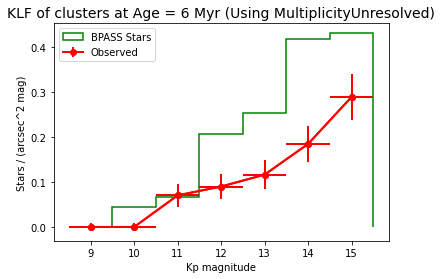

In [9]:
import matplotlib.pyplot as py
# Primary star fluxes
klf_mag_bins = np.arange(9.0, 17, 1.0)
binsKp = klf_mag_bins
binEdges = binsKp[0:-1] + (binsKp[1:] - binsKp[0:-1]) / 2.0

weightsBPS = np.array([1.0 for x in totl_BPASS])
weightsBPS *= scaleFactorBPS
(n1, b1, p1) = py.hist(totl_BPASS, bins=binEdges, weights=weightsBPS,
                       histtype='step', color='green',
                       label='BPASS Stars', align='mid',
                       linewidth=1.5)
py.errorbar(result.Kp[idx],
            result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, linewidth=2)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
            label='Observed')
py.legend(loc='upper left', numpoints=1)
py.xlabel('Kp magnitude')
py.ylabel('Stars / (arcsec^2 mag)')
py.title('KLF of clusters at Age = %d Myr (Using MultiplicityUnresolved)' % (10**(6.78 - 6)),
         fontsize=14)

**Now I create the MIST v1 cluster and then make the final figure of the talk.**

In [10]:
MIST_iso = synthetic.IsochronePhot(6.62, 2.7, 8000, 0.0, recomp=False,
                                   filters=['nirc2,Kp'])
MIST_Cluster = synthetic.ResolvedCluster(MIST_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)
Merged_iso = synthetic.IsochronePhot(6.62, 2.7, 8000, 0.0,
                                     evo_model=
                                     evolution.MergedBaraffePisaEkstromParsec(),
                                     recomp=False,
                                     filters=['nirc2,Kp'])
Merged_Clus = synthetic.ResolvedCluster(Merged_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)

Changing to logg=4.00 for T= 32989 logg=4.00
Changing to logg=4.00 for T= 33286 logg=3.98
Changing to logg=4.00 for T= 33563 logg=3.97
Changing to logg=4.00 for T= 33826 logg=3.96
Changing to logg=4.00 for T= 34083 logg=3.95
Changing to logg=4.00 for T= 34350 logg=3.93
Changing to logg=4.00 for T= 34634 logg=3.92
Changing to logg=4.00 for T= 34902 logg=3.90
Changing to logg=4.00 for T= 35110 logg=3.88
Changing to logg=4.00 for T= 35292 logg=3.86
Changing to logg=4.00 for T= 35451 logg=3.84
Changing to logg=4.00 for T= 35552 logg=3.82
Changing to logg=4.00 for T= 35576 logg=3.81
Changing to logg=4.00 for T= 35592 logg=3.80
Changing to logg=4.00 for T= 35594 logg=3.79
Changing to logg=4.00 for T= 35589 logg=3.78
Changing to logg=4.00 for T= 35583 logg=3.77
Changing to logg=4.00 for T= 35586 logg=3.76
Changing to logg=4.00 for T= 35581 logg=3.74
Changing to logg=4.00 for T= 35554 logg=3.73
Changing to logg=4.00 for T= 35513 logg=3.71
Changing to logg=4.00 for T= 35458 logg=3.70
Changing t

In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual MIST stars' magnitudes (not necessarily just of star systems)

In [11]:
totl_mist = (MIST_Cluster.star_systems['m_nirc2_Kp']
             [np.where((MIST_Cluster.star_systems['isWR'] == 0))[0]])
totl_merged = (Merged_Clus.star_systems['m_nirc2_Kp']
               [np.where((Merged_Clus.star_systems['isWR'] == 0))[0]])
# Now find the magintudes of just the primary star

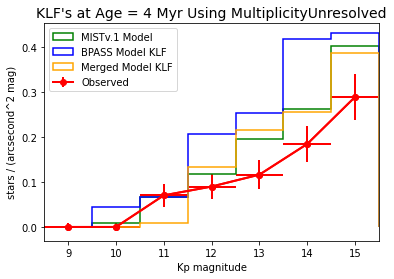

In [12]:
import matplotlib.pyplot as py

# Setting up framework so that I can scale the number of stars in mass bin
# into density: number of stars per square arcsecond.

# I won't be using the sum of initial masses of only existing stars for
# the scale factors

mist_scale = scaleFactorBPS
merged_scale = scaleFactorBPS
weights_MST = np.array([1.0 for x in totl_mist])
weights_MST *= mist_scale
weights_merged = np.array([1.0 for x in totl_merged])
weights_merged *= merged_scale
# Binning the K' magnitudes into their respective bins

py.hist(totl_mist, bins=binEdges, histtype='step',
        weights=weights_MST, color='green', label='MISTv.1 Model',
        align='mid', linewidth=1.5)
py.hist(totl_BPASS, bins=binEdges, histtype='step',
        weights=weightsBPS, color='blue',
        label='BPASS Model KLF',
        align='mid', linewidth=1.5)
py.hist(totl_merged, bins=binEdges, histtype='step',
        weights=weights_merged, color='orange',
        label='Merged Model KLF',
        align='mid', linewidth=1.5)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, capsize=0, linewidth=2)
py.errorbar(result.Kp[idx],result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
       label='Observed')
py.xlim(8.5, 15.5)
py.xlabel('Kp magnitude')
py.ylabel("stars / (arcsecond^2 mag)")
py.title("KLF's at Age = %d Myr Using MultiplicityUnresolved" % (10**(6.62- 6)), fontsize=14)
py.legend(loc='upper left', numpoints=1)
py.savefig("StillBadKLF1CurrPar.png")

First, I examine the intended total initial mass of primary stars (of multi-star systems). (**Note that all masses from now on will be in units of solar masses**)

In [13]:
BPASS_Cluster.intended_primaries_mass

464851.9256566654

Here's what it actually turns out to be.

In [14]:
BPASS_Cluster.star_systems['mass'][np.where(BPASS_Cluster.star_systems['isMultiple'])].sum()

438642.0

Then, I examine the intended total mass of companion stars (of multi-star systems)

In [15]:
BPASS_Cluster.intended_companions_mass

446115.9493469707

Here's what it actually turns out to be.

In [16]:
BPASS_Cluster.companions['mass'].sum()

425782.74

Finally, I examine the intended total mass of the cluster's single stars (of multi-star systems)

In [17]:
BPASS_Cluster.intended_singles_mass

89033.40809548502

Here's what it actually turns out to be.

In [18]:
BPASS_Cluster.star_systems['mass'][np.where(~ BPASS_Cluster.star_systems['isMultiple'])].sum()

89054.58

Now what is the joint distribution of unmatchable primaries and secondaries

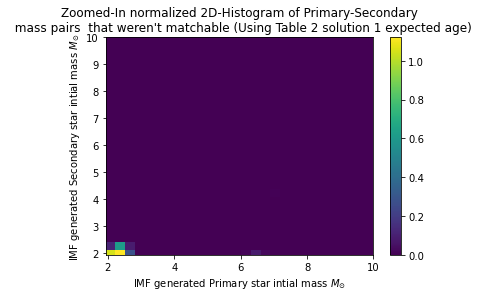

In [19]:
py.hist2d(BPASS_Cluster.unmatched_primary_pairs[:, 0],
          BPASS_Cluster.unmatched_primary_pairs[:, 1],
          density=True, bins=500)
py.gca().set_xlim([np.min(BPASS_Cluster.unmatched_primary_pairs[:, 0]),
                   10])
py.gca().set_ylim([np.min(BPASS_Cluster.unmatched_primary_pairs[:, 0]),
                   10])
py.xlabel("IMF generated Primary star intial mass $M_{\odot}$")
py.ylabel("IMF generated Secondary star intial mass $M_{\odot}$")
py.title("Zoomed-In normalized 2D-Histogram of Primary-Secondary\n  mass pairs "+
         " that weren't matchable (Using Table 2 solution 1 expected age)")
py.colorbar()
py.savefig("ZoomdInhistCurrPar.png")

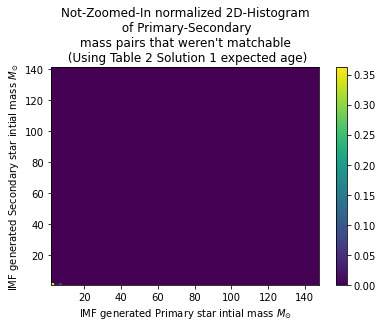

In [20]:
py.hist2d(BPASS_Cluster.unmatched_primary_pairs[:, 0],
          BPASS_Cluster.unmatched_primary_pairs[:, 1],
          density=True, bins=100)
py.xlabel("IMF generated Primary star intial mass $M_{\odot}$")
py.ylabel("IMF generated Secondary star intial mass $M_{\odot}$")
py.title("Not-Zoomed-In normalized 2D-Histogram\n of Primary-Secondary\n" +
         " mass pairs that weren't matchable \n"+
         " (Using Table 2 Solution 1 expected age)")
py.colorbar()
py.savefig("NotZoomdInhistCurrPar.png")

I want to see which kinds of stars are in that hotspot in the penultimate histogram... (at around (2, 2)).

In [21]:
BPASS_Cluster.unmatched_primary_pairs[np.where(np.isclose(BPASS_Cluster.unmatched_primary_pairs[:, 0], 2.0, atol=0.08) &
                                               np.isclose(BPASS_Cluster.unmatched_primary_pairs[:, 1], 2.0, atol=0.08))]

array([[2.03145344, 2.00879684],
       [2.05152491, 1.96421534],
       [2.00613102, 1.93174252],
       [2.03613699, 1.97375771],
       [2.07012634, 2.03066253],
       [2.05904444, 1.95590527],
       [2.06305868, 1.98750783],
       [2.05627709, 2.03226761],
       [2.04279832, 1.93540106],
       [1.98721972, 1.96866804],
       [1.9865475 , 1.92502343],
       [2.07719936, 2.04660506],
       [1.98263045, 1.94742611],
       [2.00641857, 1.9291684 ],
       [2.03444904, 2.03129079],
       [1.97939856, 1.92799729],
       [1.96644613, 1.95515207],
       [1.95132261, 1.93851501],
       [2.07242681, 2.04299515],
       [2.01039335, 1.95450249],
       [2.07434139, 1.95885469],
       [2.01682305, 1.93905269],
       [1.93336021, 1.93045319],
       [2.07373409, 2.04630277],
       [1.98722167, 1.92960848],
       [2.06761577, 1.97958883],
       [1.99747891, 1.94705737],
       [2.02561858, 2.00222329],
       [2.02843068, 1.98711769],
       [2.04294064, 1.93977249],
       [2.

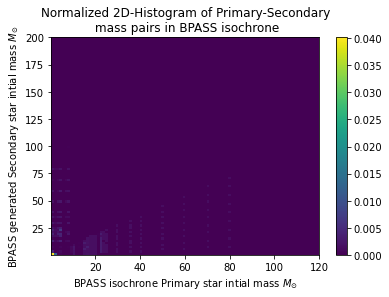

In [22]:
py.hist2d(BPASS_iso.primaries['mass'],
          BPASS_iso.secondaries['mass'],
          density=True, bins=100)
py.xlabel("BPASS isochrone Primary star intial mass $M_{\odot}$")
py.ylabel("BPASS generated Secondary star intial mass $M_{\odot}$")
py.title("Normalized 2D-Histogram of Primary-Secondary\n mass pairs in BPASS isochrone")
py.colorbar()
py.savefig("NotZoomdInhistIsoCurrPar.png")

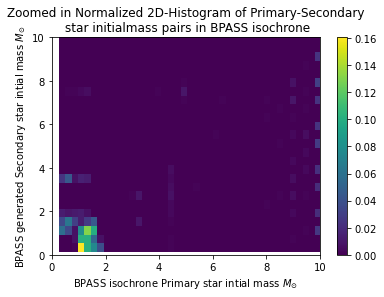

In [23]:
py.hist2d(BPASS_iso.primaries['mass'],
          BPASS_iso.secondaries['mass'],
          density=True, bins=500)
py.gca().set_xlim([0, 10])
py.gca().set_ylim([0, 10])

py.xlabel("BPASS isochrone Primary star intial mass $M_{\odot}$")
py.ylabel("BPASS generated Secondary star intial mass $M_{\odot}$")
py.title("Zoomed in Normalized 2D-Histogram of Primary-Secondary\n star initial" +
         "mass pairs in BPASS isochrone")
py.colorbar()
py.savefig("ZoomdInhistIsoCurrPar.png")

Now trying to see the non-density of set of represented stellar masses by plotting Mass Kp-Mag Relationships

No handles with labels found to put in legend.


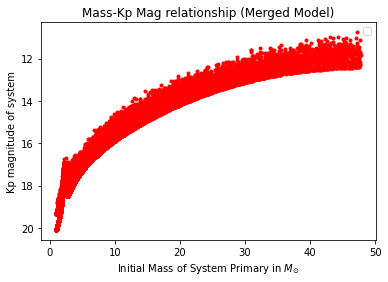

In [24]:
import matplotlib.pyplot as plt
plt.plot(Merged_Clus.star_systems['mass'][np.where((Merged_Clus.star_systems['isWR'] == 0))],
        Merged_Clus.star_systems['m_nirc2_Kp'][np.where((Merged_Clus.star_systems['isWR'] == 0))], "r.")
plt.gca().invert_yaxis()
plt.title("Mass-Kp Mag relationship (Merged Model)")
plt.xlabel("Initial Mass of System Primary in $M_{\odot}$")
plt.ylabel("Kp magnitude of system")
plt.legend()

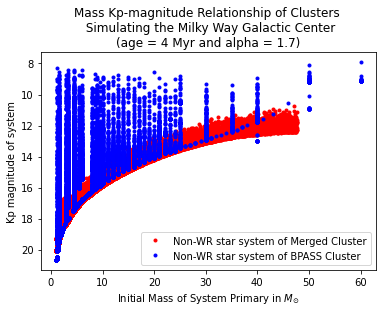

In [25]:
plt.plot(Merged_Clus.star_systems['mass'][np.where((Merged_Clus.star_systems['isWR'] == 0))],
        Merged_Clus.star_systems['m_nirc2_Kp'][np.where((Merged_Clus.star_systems['isWR'] == 0))], "r.",
        label = "Non-WR star system of Merged Cluster")
plt.plot(BPASS_Cluster.star_systems['mass'][np.where((BPASS_Cluster.star_systems['isWR'] == 0))],
        BPASS_Cluster.star_systems['m_nirc2_Kp'][np.where((BPASS_Cluster.star_systems['isWR'] == 0))], "b.",
        label = "Non-WR star system of BPASS Cluster")
plt.xlabel("Initial Mass of System Primary in $M_{\odot}$")
plt.ylabel("Kp magnitude of system")
plt.title("Mass Kp-magnitude Relationship of Clusters \n Simulating the Milky Way Galactic Center"+
          "\n(age = 4 Myr and alpha = 1.7)")
plt.gca().invert_yaxis()
plt.legend()
plt.savefig("MassMagRelT2S1.png")